# Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp = pd.read_csv('raw data/national-gdp-constant-usd-wb.csv')
gdp.head()

,Entity,Code,Year,GDP (constant 2015 US$)
0,Afghanistan,AFG,2002,7555185000
1,Afghanistan,AFG,2003,8222480400
2,Afghanistan,AFG,2004,8338755600
3,Afghanistan,AFG,2005,9275174000
4,Afghanistan,AFG,2006,9772083000


In [3]:
gdp.columns = ['area','iso_alpha3_code','year','gdp']

gdp.head()

,area,iso_alpha3_code,year,gdp
0,Afghanistan,AFG,2002,7555185000
1,Afghanistan,AFG,2003,8222480400
2,Afghanistan,AFG,2004,8338755600
3,Afghanistan,AFG,2005,9275174000
4,Afghanistan,AFG,2006,9772083000


In [4]:
display(gdp.shape)
display(gdp.dtypes)
gdp.isna().sum()

(10669, 4)

area               object
iso_alpha3_code    object
year                int64
gdp                 int64
dtype: object

area                 0
iso_alpha3_code    779
year                 0
gdp                  0
dtype: int64

In [5]:
gdp[gdp.iso_alpha3_code.isna()==True].area.value_counts()

East Asia and Pacific (WB)           62
High-income countries                62
Latin America and Caribbean (WB)     62
Lower-middle-income countries        62
Middle-income countries              62
North America (WB)                   62
South Asia (WB)                      62
Sub-Saharan Africa (WB)              62
Upper-middle-income countries        62
Europe and Central Asia (WB)         52
European Union (27)                  52
Middle East and North Africa (WB)    47
Low-income countries                 41
West Bank and Gaza                   28
Faeroe Islands                        1
Name: area, dtype: int64

In [6]:
gdp[gdp.iso_alpha3_code.isna()==False].year.value_counts()

2015    209
2014    207
2013    207
2017    206
2011    206
       ... 
1961     92
1962     92
1963     92
1964     92
1960     88
Name: year, Length: 62, dtype: int64

In [7]:
balance = pd.read_csv('presentation data/national_balance.csv', encoding='ISO-8859-1').drop(['Unnamed: 0'], axis = 1)
display(balance.shape)
balance.head()

(1980, 15)

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,population,fat_supply_g_per_day Animal Products,fat_supply_g_per_day Grand Total,fat_supply_g_per_day Vegetal Products,food_supply_kcal_per_day Animal Products,food_supply_kcal_per_day Grand Total,food_supply_kcal_per_day Vegetal Products,protein_supply_g_per_day Animal Products,protein_supply_g_per_day Grand Total,protein_supply_g_per_day Vegetal Products
0,Australia and New Zealand,Australia,AUS,0,2010,22155000.0,1.619752e+09,3.351387e+09,1.731856e+09,2.321844e+10,7.554855e+10,5.235226e+10,1.641021e+09,2.456325e+09,815525550.0
1,Australia and New Zealand,Australia,AUS,0,2011,22538000.0,1.666234e+09,3.498123e+09,1.832114e+09,2.395789e+10,7.640382e+10,5.244593e+10,1.709282e+09,2.494055e+09,784773160.0
2,Australia and New Zealand,Australia,AUS,0,2012,22904000.0,1.711387e+09,3.582873e+09,1.871486e+09,2.448438e+10,7.872105e+10,5.423667e+10,1.713219e+09,2.521730e+09,808511200.0
3,Australia and New Zealand,Australia,AUS,0,2013,23255000.0,1.725754e+09,3.550108e+09,1.824355e+09,2.455728e+10,7.974140e+10,5.518412e+10,1.717149e+09,2.544097e+09,826947800.0
4,Australia and New Zealand,Australia,AUS,0,2014,23596000.0,1.798959e+09,3.732887e+09,1.933928e+09,2.520053e+10,8.053315e+10,5.533262e+10,1.728171e+09,2.544357e+09,816185640.0


In [8]:
display(balance.isna().sum())
balance.dtypes

sub_region_name                              0
area                                         0
iso_alpha3_code                              0
least_developed_countries_ldc                0
year                                         0
population                                   0
fat_supply_g_per_day Animal Products         0
fat_supply_g_per_day Grand Total             0
fat_supply_g_per_day Vegetal Products        0
food_supply_kcal_per_day Animal Products     0
food_supply_kcal_per_day Grand Total         0
food_supply_kcal_per_day Vegetal Products    0
protein_supply_g_per_day Animal Products     0
protein_supply_g_per_day Grand Total         0
protein_supply_g_per_day Vegetal Products    0
dtype: int64

sub_region_name                               object
area                                          object
iso_alpha3_code                               object
least_developed_countries_ldc                 object
year                                           int64
population                                   float64
fat_supply_g_per_day Animal Products         float64
fat_supply_g_per_day Grand Total             float64
fat_supply_g_per_day Vegetal Products        float64
food_supply_kcal_per_day Animal Products     float64
food_supply_kcal_per_day Grand Total         float64
food_supply_kcal_per_day Vegetal Products    float64
protein_supply_g_per_day Animal Products     float64
protein_supply_g_per_day Grand Total         float64
protein_supply_g_per_day Vegetal Products    float64
dtype: object

In [9]:
balance.columns = [x.lower() for x in balance.columns]
balance.columns = balance.columns.str.replace(" ", "_").str.replace("-", "_")
balance.columns

Index(['sub_region_name', 'area', 'iso_alpha3_code',
       'least_developed_countries_ldc', 'year', 'population',
       'fat_supply_g_per_day_animal_products',
       'fat_supply_g_per_day_grand_total',
       'fat_supply_g_per_day_vegetal_products',
       'food_supply_kcal_per_day_animal_products',
       'food_supply_kcal_per_day_grand_total',
       'food_supply_kcal_per_day_vegetal_products',
       'protein_supply_g_per_day_animal_products',
       'protein_supply_g_per_day_grand_total',
       'protein_supply_g_per_day_vegetal_products'],
      dtype='object')

In [10]:
balance['kcal_per_capita_per_day'] = balance['food_supply_kcal_per_day_grand_total'] / balance['population']
balance['protein_g_per_capita_per_day'] = balance['protein_supply_g_per_day_grand_total'] / balance['population']
balance['fat_g_per_capita_per_day'] = balance['fat_supply_g_per_day_grand_total'] / balance['population']
balance['animal_proportion'] = balance['food_supply_kcal_per_day_animal_products'] / balance['food_supply_kcal_per_day_grand_total']

balance = balance.drop(['area',
                        'fat_supply_g_per_day_animal_products',
                        'fat_supply_g_per_day_grand_total',
                        'fat_supply_g_per_day_vegetal_products',
                        'food_supply_kcal_per_day_animal_products',
                        'food_supply_kcal_per_day_grand_total',
                        'food_supply_kcal_per_day_vegetal_products',
                        'protein_supply_g_per_day_animal_products',
                        'protein_supply_g_per_day_grand_total',
                        'protein_supply_g_per_day_vegetal_products'], axis=1)

In [11]:
display(balance.shape)
display(balance.head())
balance.isna().sum()

(1980, 9)

,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,year,population,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion
0,Australia and New Zealand,AUS,0,2010,22155000.0,3410.0,110.87,151.27,0.307331
1,Australia and New Zealand,AUS,0,2011,22538000.0,3390.0,110.66,155.21,0.313569
2,Australia and New Zealand,AUS,0,2012,22904000.0,3437.0,110.10,156.43,0.311027
3,Australia and New Zealand,AUS,0,2013,23255000.0,3429.0,109.40,152.66,0.307962
4,Australia and New Zealand,AUS,0,2014,23596000.0,3413.0,107.83,158.20,0.312921


sub_region_name                   0
iso_alpha3_code                   0
least_developed_countries_ldc     0
year                              0
population                        0
kcal_per_capita_per_day          60
protein_g_per_capita_per_day     60
fat_g_per_capita_per_day         60
animal_proportion                60
dtype: int64

In [12]:
balance[balance.kcal_per_capita_per_day.isna()==True]

,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,year,population,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion
671,Micronesia,FSM,0,2010,0.0,NaN,NaN,NaN,NaN
672,Micronesia,FSM,0,2011,0.0,NaN,NaN,NaN,NaN
673,Micronesia,FSM,0,2012,0.0,NaN,NaN,NaN,NaN
674,Micronesia,FSM,0,2013,0.0,NaN,NaN,NaN,NaN
675,Micronesia,FSM,0,2014,0.0,NaN,NaN,NaN,NaN
676,Micronesia,FSM,0,2015,0.0,NaN,NaN,NaN,NaN
677,Micronesia,FSM,0,2016,0.0,NaN,NaN,NaN,NaN
678,Micronesia,FSM,0,2017,0.0,NaN,NaN,NaN,NaN
679,Micronesia,FSM,0,2018,0.0,NaN,NaN,NaN,NaN
682,Micronesia,NRU,0,2010,0.0,NaN,NaN,NaN,NaN


In [13]:
# drop these from analysis
balance.drop(balance[balance.kcal_per_capita_per_day.isna()==True].index, inplace = True)
balance

,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,year,population,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion
0,Australia and New Zealand,AUS,0,2010,22155000.0,3410.0,110.87,151.27,0.307331
1,Australia and New Zealand,AUS,0,2011,22538000.0,3390.0,110.66,155.21,0.313569
2,Australia and New Zealand,AUS,0,2012,22904000.0,3437.0,110.10,156.43,0.311027
3,Australia and New Zealand,AUS,0,2013,23255000.0,3429.0,109.40,152.66,0.307962
4,Australia and New Zealand,AUS,0,2014,23596000.0,3413.0,107.83,158.20,0.312921
...,...,...,...,...,...,...,...,...,...
1975,Western Europe,CHE,0,2016,8380000.0,3364.0,96.67,155.19,0.337396
1976,Western Europe,CHE,0,2017,8456000.0,3388.0,96.92,154.81,0.334416
1977,Western Europe,CHE,0,2018,8526000.0,3379.0,97.37,157.91,0.332939
1978,Western Europe,CHE,0,2019,8591360.0,3386.0,96.49,158.19,0.320142


In [14]:
trade = pd.read_csv('presentation data/trade.csv', encoding='ISO-8859-1').drop(['Unnamed: 0'], axis = 1)
display(trade.shape)
display(trade.head())
trade.isna().sum()

(41492, 12)

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,item_code_cpc,Total Population - Both sexes_1000 persons,Food supply _kcal/capita/day,kcal_produced,kcal_imported,kcal_exported,kcal_lost
0,Australia and New Zealand,Australia,AUS,0,2010,'S2905,22155.0,698.0,9.387297e+13,1.451745e+12,6.083596e+13,1.070592e+12
1,Australia and New Zealand,Australia,AUS,0,2010,'S2907,22155.0,95.0,8.142077e+11,7.234677e+10,2.942920e+10,1.778014e+10
2,Australia and New Zealand,Australia,AUS,0,2010,'S2908,22155.0,0.0,9.453878e+13,0.000000e+00,0.000000e+00,5.084845e+12
3,Australia and New Zealand,Australia,AUS,0,2010,'S2909,22155.0,488.0,6.277010e+12,3.902734e+11,4.560895e+12,1.359838e+09
4,Australia and New Zealand,Australia,AUS,0,2010,'S2911,22155.0,68.0,8.690983e+12,5.187614e+10,3.648622e+12,4.150091e+11


sub_region_name                               0
area                                          0
iso_alpha3_code                               0
least_developed_countries_ldc                 0
year                                          0
item_code_cpc                                 0
Total Population - Both sexes_1000 persons    0
Food supply _kcal/capita/day                  0
kcal_produced                                 0
kcal_imported                                 0
kcal_exported                                 0
kcal_lost                                     0
dtype: int64

In [15]:
trade = trade.groupby(['iso_alpha3_code','year']).agg({'Total Population - Both sexes_1000 persons':np.mean,'kcal_produced':sum, 'kcal_imported':sum, 'kcal_exported':sum, 'kcal_lost':sum}).reset_index()
trade.head()

,iso_alpha3_code,year,Total Population - Both sexes_1000 persons,kcal_produced,kcal_imported,kcal_exported,kcal_lost
0,AFG,2010,29186.0,2.312284e+13,8.729415e+12,2.446829e+11,2.789070e+12
1,AFG,2011,30117.0,1.921767e+13,9.979912e+12,2.089458e+11,2.199432e+12
2,AFG,2012,31161.0,2.496754e+13,8.713066e+12,1.931892e+11,3.054212e+12
3,AFG,2013,32270.0,2.530657e+13,9.574621e+12,2.500760e+11,3.140644e+12
4,AFG,2014,33371.0,2.709133e+13,1.005059e+13,4.161023e+11,3.268202e+12


In [16]:
trade['kcal_prod_per_capita_per_day'] = trade['kcal_produced'] / (365 * 1000 * trade['Total Population - Both sexes_1000 persons'])
trade['kcal_imp_per_capita_per_day'] = trade['kcal_imported'] / (365 * 1000 * trade['Total Population - Both sexes_1000 persons'])
trade['kcal_exp_per_capita_per_day'] = trade['kcal_exported'] / (365 * 1000 * trade['Total Population - Both sexes_1000 persons'])
trade['kcal_lost_per_capita_per_day'] = trade['kcal_lost'] / (365 * 1000 * trade['Total Population - Both sexes_1000 persons'])

In [17]:
trade = trade.drop(['Total Population - Both sexes_1000 persons',
                   'kcal_produced',
                   'kcal_imported',
                   'kcal_exported',
                   'kcal_lost'], axis=1)
display(trade.shape)
trade.head()

(1980, 6)

,iso_alpha3_code,year,kcal_prod_per_capita_per_day,kcal_imp_per_capita_per_day,kcal_exp_per_capita_per_day,kcal_lost_per_capita_per_day
0,AFG,2010,2170.569894,819.441009,22.968684,261.813433
1,AFG,2011,1748.220440,907.866812,19.007677,200.081093
2,AFG,2012,2195.186495,766.066988,16.985514,268.531344
3,AFG,2013,2148.530067,812.886247,21.231474,266.640931
4,AFG,2014,2224.171250,825.143831,34.161584,268.316159


In [18]:
trade.isna().sum()

iso_alpha3_code                  0
year                             0
kcal_prod_per_capita_per_day    60
kcal_imp_per_capita_per_day     60
kcal_exp_per_capita_per_day     60
kcal_lost_per_capita_per_day    60
dtype: int64

In [19]:
trade.drop(trade[trade.kcal_prod_per_capita_per_day.isna()==True].index, inplace = True)
trade.head()

,iso_alpha3_code,year,kcal_prod_per_capita_per_day,kcal_imp_per_capita_per_day,kcal_exp_per_capita_per_day,kcal_lost_per_capita_per_day
0,AFG,2010,2170.569894,819.441009,22.968684,261.813433
1,AFG,2011,1748.220440,907.866812,19.007677,200.081093
2,AFG,2012,2195.186495,766.066988,16.985514,268.531344
3,AFG,2013,2148.530067,812.886247,21.231474,266.640931
4,AFG,2014,2224.171250,825.143831,34.161584,268.316159


In [20]:
data = pd.merge(left = balance, right = trade, how = 'left', on = ['iso_alpha3_code', 'year'])
display(data.shape)
data.head()

(1920, 13)

,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,year,population,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion,kcal_prod_per_capita_per_day,kcal_imp_per_capita_per_day,kcal_exp_per_capita_per_day,kcal_lost_per_capita_per_day
0,Australia and New Zealand,AUS,0,2010,22155000.0,3410.0,110.87,151.27,0.307331,29322.301451,942.055634,10041.415012,868.803034
1,Australia and New Zealand,AUS,0,2011,22538000.0,3390.0,110.66,155.21,0.313569,29453.325391,956.548080,11170.664364,760.697566
2,Australia and New Zealand,AUS,0,2012,22904000.0,3437.0,110.10,156.43,0.311027,31375.027417,955.914539,14851.134641,791.170854
3,Australia and New Zealand,AUS,0,2013,23255000.0,3429.0,109.40,152.66,0.307962,28818.543009,988.499892,12654.334224,781.339393
4,Australia and New Zealand,AUS,0,2014,23596000.0,3413.0,107.83,158.20,0.312921,31161.974841,1182.917469,12738.122850,812.692006


In [21]:
data.isna().sum()

sub_region_name                  0
iso_alpha3_code                  0
least_developed_countries_ldc    0
year                             0
population                       0
kcal_per_capita_per_day          0
protein_g_per_capita_per_day     0
fat_g_per_capita_per_day         0
animal_proportion                0
kcal_prod_per_capita_per_day     0
kcal_imp_per_capita_per_day      0
kcal_exp_per_capita_per_day      0
kcal_lost_per_capita_per_day     0
dtype: int64

In [22]:
data = pd.merge(left = data, right = gdp, how = 'left', on = ['iso_alpha3_code','year']).drop(['area'],axis=1)
display(data.shape)
data.head()

(1920, 14)

,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,year,population,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion,kcal_prod_per_capita_per_day,kcal_imp_per_capita_per_day,kcal_exp_per_capita_per_day,kcal_lost_per_capita_per_day,gdp
0,Australia and New Zealand,AUS,0,2010,22155000.0,3410.0,110.87,151.27,0.307331,29322.301451,942.055634,10041.415012,868.803034,1.181078e+12
1,Australia and New Zealand,AUS,0,2011,22538000.0,3390.0,110.66,155.21,0.313569,29453.325391,956.548080,11170.664364,760.697566,1.209322e+12
2,Australia and New Zealand,AUS,0,2012,22904000.0,3437.0,110.10,156.43,0.311027,31375.027417,955.914539,14851.134641,791.170854,1.256510e+12
3,Australia and New Zealand,AUS,0,2013,23255000.0,3429.0,109.40,152.66,0.307962,28818.543009,988.499892,12654.334224,781.339393,1.288912e+12
4,Australia and New Zealand,AUS,0,2014,23596000.0,3413.0,107.83,158.20,0.312921,31161.974841,1182.917469,12738.122850,812.692006,1.322153e+12


In [23]:
data['gdp_per_capita'] = data['gdp'] / data['population']

In [24]:
data.isna().sum()

sub_region_name                   0
iso_alpha3_code                   0
least_developed_countries_ldc     0
year                              0
population                        0
kcal_per_capita_per_day           0
protein_g_per_capita_per_day      0
fat_g_per_capita_per_day          0
animal_proportion                 0
kcal_prod_per_capita_per_day      0
kcal_imp_per_capita_per_day       0
kcal_exp_per_capita_per_day       0
kcal_lost_per_capita_per_day      0
gdp                              40
gdp_per_capita                   40
dtype: int64

In [25]:
data.drop(data[data.gdp.isna()==True].index, inplace = True)

In [26]:
data.to_csv('presentation data/model_data.csv')

### First Regression Model To Predict GDP

In [27]:
X = data.drop(['iso_alpha3_code','gdp','gdp_per_capita'], axis=1).copy()

y = data['gdp_per_capita']

In [28]:
X.dtypes

sub_region_name                   object
least_developed_countries_ldc     object
year                               int64
population                       float64
kcal_per_capita_per_day          float64
protein_g_per_capita_per_day     float64
fat_g_per_capita_per_day         float64
animal_proportion                float64
kcal_prod_per_capita_per_day     float64
kcal_imp_per_capita_per_day      float64
kcal_exp_per_capita_per_day      float64
kcal_lost_per_capita_per_day     float64
dtype: object

In [29]:
regions = pd.DataFrame(X.sub_region_name.value_counts(normalize=True))
regions

,sub_region_name
Sub-Saharan Africa,0.247872
Latin America and the Caribbean,0.187234
Western Asia,0.088830
Southern Europe,0.070213
Eastern Europe,0.058511
Northern Europe,0.058511
South-eastern Asia,0.052660
Southern Asia,0.047872
Western Europe,0.035106
Northern Africa,0.034043


In [30]:
# I'll group the lower frequency regions
less_freq_regions = regions[regions['sub_region_name']<0.05].index.tolist()

X["sub_region_name"].loc[X["sub_region_name"].isin(less_freq_regions)] = "Other"

X.sub_region_name.value_counts()

C:\Users\eliza\AppData\Local\Temp\ipykernel_13896\3783297240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["sub_region_name"].loc[X["sub_region_name"].isin(less_freq_regions)] = "Other"


Sub-Saharan Africa                 466
Other                              444
Latin America and the Caribbean    352
Western Asia                       167
Southern Europe                    132
Eastern Europe                     110
Northern Europe                    110
South-eastern Asia                  99
Name: sub_region_name, dtype: int64

In [31]:
X.least_developed_countries_ldc.value_counts()

0    1438
x     442
Name: least_developed_countries_ldc, dtype: int64

In [32]:
# this is categorical, but can be included in numericals for scaling
# it is also imbalanced, so we might improve by oversampling
X.least_developed_countries_ldc = X.least_developed_countries_ldc.replace('x',1).astype('int')

In [33]:
# this will be treated as a categorical and OneHot encoded
X.year = X.year.astype('object')

In [34]:
X.year.value_counts()

2019    175
2020    174
2015    172
2014    171
2016    171
2017    171
2018    171
2013    170
2012    169
2010    168
2011    168
Name: year, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
y_train

,sub_region_name,least_developed_countries_ldc,year,population,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion,kcal_prod_per_capita_per_day,kcal_imp_per_capita_per_day,kcal_exp_per_capita_per_day,kcal_lost_per_capita_per_day
1500,Sub-Saharan Africa,1,2014,3931000.0,2882.0,82.35,71.17,0.154754,1698.546228,3157.419566,289.635335,108.707827
283,Latin America and the Caribbean,0,2018,287000.0,2949.0,89.45,92.88,0.240420,6019.855625,5402.695366,1099.952546,271.335547
196,Eastern Europe,0,2019,4043260.0,2679.0,69.81,73.63,0.198208,12287.237678,632.165174,4927.427725,173.236124
865,Northern Europe,0,2015,65860000.0,3393.0,103.99,139.55,0.294430,6146.655494,2825.907983,1334.043788,109.690391
256,Latin America and the Caribbean,0,2013,42196000.0,3211.0,103.76,111.55,0.303332,29532.800463,118.643242,10606.881600,436.550285


1500     1488.736327
283     16782.188153
196      2264.378249
865     44562.071060
256     14073.822163
            ...     
1163     4663.546198
1327     1984.582274
893       892.113192
1495      781.731613
1159     4242.932445
Name: gdp_per_capita, Length: 1504, dtype: float64

In [36]:
X_train_num = X_train.select_dtypes(np.number).copy()
X_test_num = X_test.select_dtypes(np.number).copy()
X_train_cat = X_train.select_dtypes(object).copy()
X_test_cat = X_test.select_dtypes(object).copy()

In [37]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num)

X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_train_num.columns)

X_train_scaled.head()

,least_developed_countries_ldc,population,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion,kcal_prod_per_capita_per_day,kcal_imp_per_capita_per_day,kcal_exp_per_capita_per_day,kcal_lost_per_capita_per_day
0,1.0,0.002665,0.547692,0.457942,0.334162,0.318557,0.007903,0.124889,0.012656,0.011584
1,0.0,0.000188,0.577143,0.519070,0.462608,0.511800,0.030800,0.215888,0.048065,0.028913
2,0.0,0.002741,0.458462,0.349978,0.348716,0.416580,0.064009,0.022542,0.215314,0.018460
3,0.0,0.044757,0.772308,0.644253,0.738729,0.633631,0.031472,0.111453,0.058294,0.011688
4,0.0,0.028673,0.692308,0.642273,0.573068,0.653713,0.155387,0.001729,0.463490,0.046518


In [38]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
least_developed_countries_ldc,1504.0,0.225399,0.417984,0.0,0.000000,0.000000,0.000000,1.0
population,1504.0,0.029814,0.107346,0.0,0.001977,0.006432,0.020760,1.0
kcal_per_capita_per_day,1504.0,0.544944,0.192729,0.0,0.408681,0.538901,0.704725,1.0
protein_g_per_capita_per_day,1504.0,0.448593,0.172092,0.0,0.308394,0.451356,0.580973,1.0
fat_g_per_capita_per_day,1504.0,0.436762,0.209111,0.0,0.267749,0.412052,0.590344,1.0
animal_proportion,1504.0,0.387636,0.211980,0.0,0.217812,0.374635,0.554009,1.0
kcal_prod_per_capita_per_day,1504.0,0.041610,0.052092,0.0,0.011920,0.023522,0.054819,1.0
kcal_imp_per_capita_per_day,1504.0,0.103037,0.110763,0.0,0.034715,0.078770,0.133402,1.0
kcal_exp_per_capita_per_day,1504.0,0.100291,0.161247,0.0,0.006690,0.027696,0.122786,1.0
kcal_lost_per_capita_per_day,1504.0,0.033854,0.044190,0.0,0.013000,0.022088,0.039871,1.0


In [39]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_train_encode.head()

,sub_region_name_Latin America and the Caribbean,sub_region_name_Northern Europe,sub_region_name_Other,sub_region_name_South-eastern Asia,sub_region_name_Southern Europe,sub_region_name_Sub-Saharan Africa,sub_region_name_Western Asia,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_train_transformed = pd.concat([X_train_scaled,X_train_encode], axis = 1)
X_test_transformed = pd.concat([X_test_scaled,X_test_encode], axis = 1)

y_train = y_train.reset_index(drop=True)          # to realign the X and y datasets
y_test = y_test.reset_index(drop=True)

display(y_train.head())                           # we can see a the actual game results
X_train_transformed.head()                        # all values are now between 0 and 1

0     1488.736327
1    16782.188153
2     2264.378249
3    44562.071060
4    14073.822163
Name: gdp_per_capita, dtype: float64

,least_developed_countries_ldc,population,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion,kcal_prod_per_capita_per_day,kcal_imp_per_capita_per_day,kcal_exp_per_capita_per_day,kcal_lost_per_capita_per_day,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,1.0,0.002665,0.547692,0.457942,0.334162,0.318557,0.007903,0.124889,0.012656,0.011584,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000188,0.577143,0.519070,0.462608,0.511800,0.030800,0.215888,0.048065,0.028913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.002741,0.458462,0.349978,0.348716,0.416580,0.064009,0.022542,0.215314,0.018460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.044757,0.772308,0.644253,0.738729,0.633631,0.031472,0.111453,0.058294,0.011688,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.028673,0.692308,0.642273,0.573068,0.653713,0.155387,0.001729,0.463490,0.046518,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
X_test_transformed.head()

,least_developed_countries_ldc,population,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion,kcal_prod_per_capita_per_day,kcal_imp_per_capita_per_day,kcal_exp_per_capita_per_day,kcal_lost_per_capita_per_day,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,0.0,0.000291,0.768791,0.696944,0.668619,0.595883,0.004831,0.219586,0.016463,0.010804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.024233,0.781538,0.598881,0.842445,0.538364,0.130530,0.082489,0.668162,0.055483,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.004453,0.303297,0.195609,0.224293,0.062573,0.019284,0.014682,0.001200,0.033072,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.003445,0.810549,0.737322,0.745592,0.638418,0.027109,0.267925,0.083178,0.015696,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000187,0.560440,0.500646,0.457461,0.501832,0.028550,0.213985,0.054359,0.025949,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR = LinearRegression().fit(X_train_transformed, y_train)

y_pred = LR.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.6061557626869946

In [43]:
# a moderate score, but we can improve it

In [44]:
#define a function to prepare data as above:
def yX_transform(X_train, X_test, y_train, y_test):  
    X_train_num = X_train.select_dtypes(np.number).copy()
    X_test_num = X_test.select_dtypes(np.number).copy()
    X_train_cat = X_train.select_dtypes(object).copy()
    X_test_cat = X_test.select_dtypes(object).copy()
    
    transformer = MinMaxScaler().fit(X_train_num)
    X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns)
    X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_train_num.columns)
    
    encoder = OneHotEncoder(drop='first').fit(X_train_cat)
    cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
    X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
    X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
    
    X_train_transformed = pd.concat([X_train_scaled,X_train_encode], axis = 1)
    X_test_transformed = pd.concat([X_test_scaled,X_test_encode], axis = 1)

    y_train = y_train.reset_index(drop=True)          # to realign the X and y datasets
    y_test = y_test.reset_index(drop=True)

    return X_train_transformed, X_test_transformed, y_train, y_test

### Improving the Dataset

In [45]:
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
least_developed_countries_ldc,1504.0,0.225399,0.417984,0.0,0.000000,0.000000,0.000000,1.0
population,1504.0,0.029814,0.107346,0.0,0.001977,0.006432,0.020760,1.0
kcal_per_capita_per_day,1504.0,0.544944,0.192729,0.0,0.408681,0.538901,0.704725,1.0
protein_g_per_capita_per_day,1504.0,0.448593,0.172092,0.0,0.308394,0.451356,0.580973,1.0
fat_g_per_capita_per_day,1504.0,0.436762,0.209111,0.0,0.267749,0.412052,0.590344,1.0
animal_proportion,1504.0,0.387636,0.211980,0.0,0.217812,0.374635,0.554009,1.0
kcal_prod_per_capita_per_day,1504.0,0.041610,0.052092,0.0,0.011920,0.023522,0.054819,1.0
kcal_imp_per_capita_per_day,1504.0,0.103037,0.110763,0.0,0.034715,0.078770,0.133402,1.0
kcal_exp_per_capita_per_day,1504.0,0.100291,0.161247,0.0,0.006690,0.027696,0.122786,1.0
kcal_lost_per_capita_per_day,1504.0,0.033854,0.044190,0.0,0.013000,0.022088,0.039871,1.0


In [46]:
# clearly the population and the kcal_X_per_capita_per_day data are heavily skewed

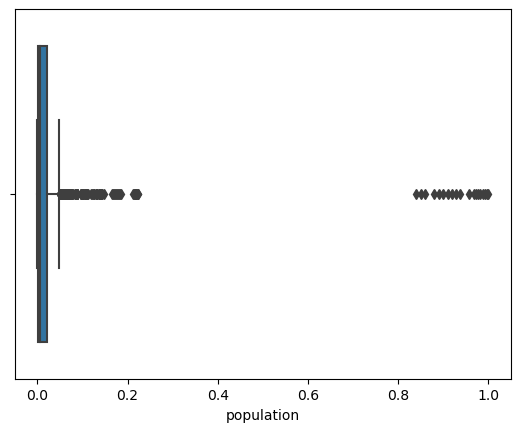

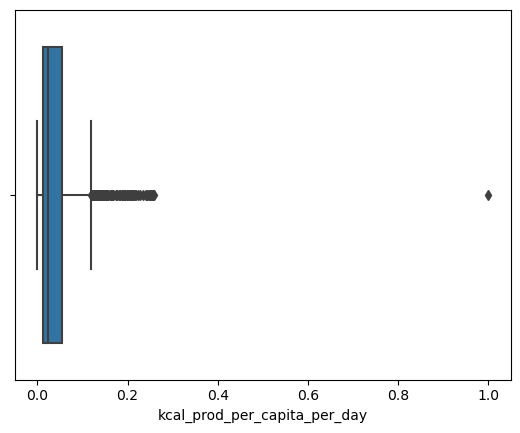

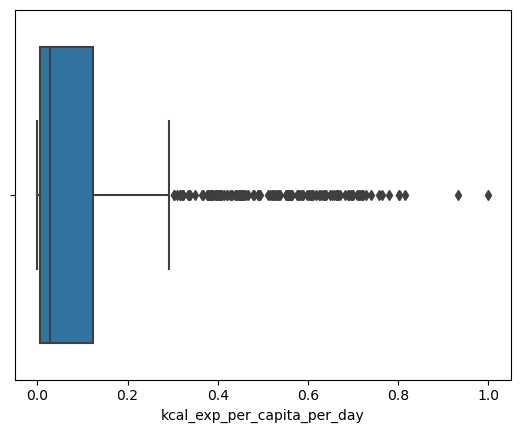

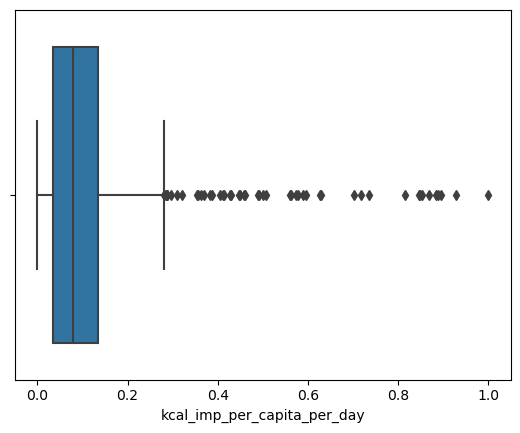

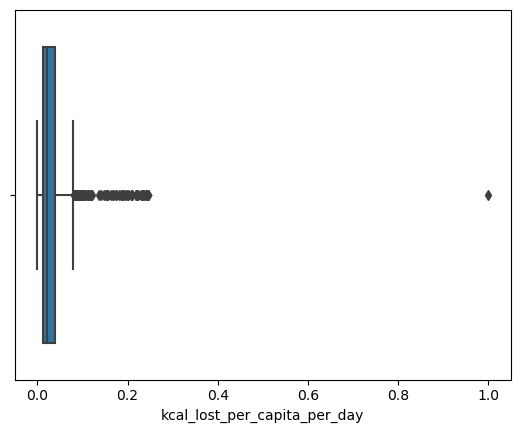

In [47]:
features = ['population','kcal_prod_per_capita_per_day','kcal_exp_per_capita_per_day','kcal_imp_per_capita_per_day','kcal_lost_per_capita_per_day']
for feat in features:
    sns.boxplot(data = X_train_transformed, x=feat)
    plt.show()

In [48]:
# there are clear outliers in population, kcal_prod and kcal_lost
# i will remove these

X_train[['kcal_prod_per_capita_per_day','kcal_exp_per_capita_per_day','kcal_imp_per_capita_per_day','kcal_lost_per_capita_per_day']].sort_values(by=['kcal_lost_per_capita_per_day'], ascending=False).head(20)

# row 86 appears erroneous so will be dropped

,kcal_prod_per_capita_per_day,kcal_exp_per_capita_per_day,kcal_imp_per_capita_per_day,kcal_lost_per_capita_per_day
86,188933.795667,125.273574,1426.613434,9384.627894
1362,48453.470401,6175.370452,3143.360478,2307.835838
1357,48421.461829,4218.899232,2227.675708,2305.678912
1356,48124.271491,4235.149212,2151.444830,2304.822656
1358,47586.069275,4371.143415,2341.143423,2302.607380
1360,46737.455571,3217.107821,2571.230019,2280.701581
1355,49111.454929,4738.509502,2087.529595,2277.550769
1363,46756.794120,5315.429762,3362.162564,2276.545354
1359,46209.802490,4160.983621,2480.280556,2266.214917
1354,48730.195007,4731.841061,1790.785503,2260.964589


In [49]:
X_train[['population']].sort_values(by=['population'], ascending=False).head(30)

,population
87,1.471287e+09
86,1.465634e+09
85,1.459378e+09
84,1.452626e+09
83,1.445524e+09
82,1.438193e+09
81,1.430671e+09
80,1.422971e+09
78,1.407325e+09
1026,1.380004e+09


In [50]:
# as China and India are so much more populous than any other country,
# they are likely skewing the data

# let's try removing these rows

drop_index = X_train[['population']].sort_values(by=['population'], ascending=False).head(19).index.tolist()
display(len(drop_index))
X_drop_train = X_train.drop(drop_index,axis=0)
y_drop_train = y_train.drop(drop_index,axis=0)

19

In [51]:
X_drop_train_transformed, X_drop_test_transformed, y_drop_train, y_drop_test = yX_transform(X_drop_train, X_test, y_drop_train, y_test)

In [52]:
X_drop_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
least_developed_countries_ldc,1485.0,0.228283,0.419867,0.0,0.000000,0.000000,0.000000,1.0
population,1485.0,0.081574,0.143759,0.0,0.008753,0.028598,0.089524,1.0
kcal_per_capita_per_day,1485.0,0.545054,0.193039,0.0,0.411429,0.538901,0.702418,1.0
protein_g_per_capita_per_day,1485.0,0.448583,0.172108,0.0,0.309514,0.451571,0.579681,1.0
fat_g_per_capita_per_day,1485.0,0.437692,0.209739,0.0,0.268430,0.412377,0.592001,1.0
animal_proportion,1485.0,0.388348,0.212696,0.0,0.219783,0.375583,0.557022,1.0
kcal_prod_per_capita_per_day,1485.0,0.157898,0.176593,0.0,0.045876,0.090812,0.211476,1.0
kcal_imp_per_capita_per_day,1485.0,0.104032,0.111099,0.0,0.035508,0.080260,0.134564,1.0
kcal_exp_per_capita_per_day,1485.0,0.101497,0.161921,0.0,0.006915,0.028531,0.124616,1.0
kcal_lost_per_capita_per_day,1485.0,0.134630,0.147379,0.0,0.052441,0.090516,0.162103,1.0


In [53]:
X_test_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
least_developed_countries_ldc,376.0,0.273936,0.446571,0.000000e+00,0.000000,0.000000,1.000000,1.000000
population,376.0,0.024165,0.086978,2.667072e-05,0.001049,0.005550,0.017978,0.961854
kcal_per_capita_per_day,376.0,0.527768,0.197150,4.747253e-02,0.383077,0.520000,0.676374,1.006593
protein_g_per_capita_per_day,376.0,0.433127,0.169869,1.584158e-02,0.303745,0.432544,0.556436,0.960999
fat_g_per_capita_per_day,376.0,0.423640,0.209106,1.419950e-03,0.260413,0.388416,0.553958,1.000887
animal_proportion,376.0,0.367940,0.207207,-1.009123e-04,0.173981,0.345412,0.526793,0.990620
kcal_prod_per_capita_per_day,376.0,0.035774,0.038023,3.261828e-05,0.010636,0.021599,0.045338,0.245894
kcal_imp_per_capita_per_day,376.0,0.109835,0.134360,2.706351e-03,0.034621,0.078701,0.133112,0.938383
kcal_exp_per_capita_per_day,376.0,0.085970,0.143642,9.900866e-07,0.004875,0.021178,0.116562,0.774507
kcal_lost_per_capita_per_day,376.0,0.032629,0.031629,0.000000e+00,0.012514,0.022929,0.042437,0.243079


In [54]:
display(X_train.shape)
display(X_train_transformed.shape)
display(y_train.shape)


display(X_drop_train.shape)
display(X_drop_train_transformed.shape)
display(y_drop_train.shape)


display(X_test_transformed.shape)
display(y_test.shape)

(1504, 12)

(1504, 27)

(1504,)

(1485, 12)

(1485, 27)

(1485,)

(376, 27)

(376,)

In [55]:
LR2 = LinearRegression().fit(X_drop_train_transformed, y_drop_train)

y_pred2 = LR2.predict(X_drop_test_transformed)

r2_score(y_drop_test, y_pred2)

0.31832600053894244

In [56]:
# this appears to have significantly worsened the model
# perhaps as we are generating large errors on the high population data

### Resampling

In [57]:
# using the original X, I will resample the 'least_developed_countries_ldc'
from sklearn.utils import resample

train = pd.concat([X_train_transformed, y_train],axis=1)

display(train.head())

ldc = train[train['least_developed_countries_ldc']==1]
non_ldc = train[train['least_developed_countries_ldc']==0]

print('ldc:      ',len(ldc),' / ',round(100*len(ldc)/len(train),1),'%')
print('non_ldc:  ',len(non_ldc),' /  ',round(100*len(non_ldc)/len(train),1),'%')

,least_developed_countries_ldc,population,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion,kcal_prod_per_capita_per_day,kcal_imp_per_capita_per_day,kcal_exp_per_capita_per_day,kcal_lost_per_capita_per_day,...,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,gdp_per_capita
0,1.0,0.002665,0.547692,0.457942,0.334162,0.318557,0.007903,0.124889,0.012656,0.011584,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1488.736327
1,0.0,0.000188,0.577143,0.519070,0.462608,0.511800,0.030800,0.215888,0.048065,0.028913,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16782.188153
2,0.0,0.002741,0.458462,0.349978,0.348716,0.416580,0.064009,0.022542,0.215314,0.018460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2264.378249
3,0.0,0.044757,0.772308,0.644253,0.738729,0.633631,0.031472,0.111453,0.058294,0.011688,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,44562.071060
4,0.0,0.028673,0.692308,0.642273,0.573068,0.653713,0.155387,0.001729,0.463490,0.046518,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14073.822163


ldc:       339  /  22.5 %
non_ldc:   1165  /   77.5 %


In [58]:
ldc_oversampled = resample(ldc,
                                    replace=True,
                                    n_samples = len(non_ldc),
                                    random_state=0)

display(ldc_oversampled.shape)
display(non_ldc.shape)

(1165, 28)

(1165, 28)

In [59]:
train_oversampled = pd.concat([ldc_oversampled,non_ldc],axis=0)
y_train_over = train_oversampled['gdp_per_capita'].copy()
X_train_over = train_oversampled.drop('gdp_per_capita',axis = 1).copy()

In [60]:
LR3 = LinearRegression().fit(X_train_over, y_train_over)

y_pred3 = LR3.predict(X_test_transformed)

r2_score(y_test, y_pred3) # a small improvement

0.6166441325697626

### Model Pipeline

In [61]:
# we will use the oversampled training data

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = KNeighborsRegressor()

In [62]:
model_pipeline = [model1, model2, model3]
model_names = ['Linear Regression', 'Decision Tree Regressor', 'KNR']

scores = {}
for model, model_name in zip(model_pipeline, model_names): # loop through two parallel lists
    mean_score = np.mean(cross_val_score(model, X_train_over, y_train_over, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Linear Regression': -31.165675419515594, 'Decision Tree Regressor': 0.9112569963121334, 'KNR': 0.5014488504418355}


In [63]:
model_pipeline = [model1, model2, model3]
model_names = ['Linear Regression', 'Decision Tree Regressor', 'KNR']

scores = {}
for model, model_name in zip(model_pipeline, model_names): # loop through two parallel lists
    score = cross_val_score(model, X_train_over, y_train_over, cv=5)
    scores[model_name] = score
print(scores)

{'Linear Regression': array([-81.79810513, -75.7557457 ,   0.64021785,   0.53815109,
         0.54710479]), 'Decision Tree Regressor': array([0.98410332, 0.98248762, 0.89978359, 0.94542868, 0.88182957]), 'KNR': array([0.49829603, 0.32992038, 0.6919135 , 0.48364174, 0.5034726 ])}


In [64]:
val_scores = {}
for model, model_name in zip(model_pipeline, model_names):
    model.fit(X_train_over, y_train_over)
    val_scores[model_name] = model.score(X_test_transformed, y_test)
print(val_scores)

{'Linear Regression': 0.6166441325697626, 'Decision Tree Regressor': 0.9041265753156138, 'KNR': 0.5269851327165309}


In [65]:
# something looks wrong on the LR, perhaps overfitting
# decision tree regressor is the best

### Parameter optimisation

In [66]:
from sklearn.model_selection import GridSearchCV

max_depth_choices= [3,4,5,6,7,8,9,10,None]
criterion_choices = ['squared_error','absolute_error']
min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
min_samples_leaf_choices = [1,2,3,4,5,6,7,8,9,10]
max_features_choices = [2,3,4,5,6,None]

grid = {'max_depth': max_depth_choices,
               'criterion': criterion_choices,
               'min_samples_split': min_samples_split_choices,
               'min_samples_leaf': min_samples_leaf_choices,
               'max_features': max_features_choices}

In [67]:
from sklearn.model_selection import RandomizedSearchCV

model = DecisionTreeRegressor()
random_search = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter=500, cv = 5, n_jobs=10)

In [68]:
%%time
random_search.fit(X_train_over, y_train_over)

random_search.best_score_

CPU times: total: 3.61 s
Wall time: 34.6 s


0.9258907461390653

In [69]:
random_search.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'squared_error'}

In [70]:
model4 = DecisionTreeRegressor(min_samples_split= 2,
                               min_samples_leaf= 1,
                               max_features= None,
                               max_depth= 9,
                               criterion= 'squared_error').fit(X_train_over, y_train_over)

In [71]:
y_pred4 = model4.predict(X_test_transformed)

r2_score(y_test, y_pred4)

0.8906927335454877